
 
# Arreglos y operaciones vectoriales con [NumPy](http://www.numpy.org/)  <a class="tocSkip">


NumPy es un paquete de computación científica con Python que provee:

- Un objecto contenedor muy versatil: arreglo N-dimensional `ndarray`
- Funciones capaces de hacer *broadcasting*
- Módulos para algebra lineal, Transformada de Fourier, generación de número aleatorios, entre otros
- Herramientas para integrar código C/C++


### Instalación <a class="tocSkip">
    
Con nuestro ambiente conda activado:

    conda install numpy
    
Esto instalará numpy y las librerías de bajo nivel BLAS y MKL

Luego importamos usando

In [ ]:
import numpy as np
display(np.__version__)

Contenidos del namespace np

In [ ]:
np?

# Objeto ndarray (alias array)

El objeto ndaray es un **arreglo n-dimensional de tipo fijo**

Las operaciones sobre ndarray son eficientes: Usan librerías de bajo nivel (OpenBLAS, MKL)

Podemos crear un ndarray a partir de 
- una lista o tupla usando `np.array`
- un fichero, por ejemplo usando `np.genfromtxt`
- funciones generadoras de NumPy, por ejemplo `np.linspace`, `np.zeros`, etc

## Ndarray a partir de listas y atributos básicos

In [ ]:
L = [[0, 1], [2, 3]]
display(type(L))
# Creación de un ndarray
A = np.array(L)
display(type(A))
A

Los tipos de dato estándar de NumPy son
- Enteros: int8, int16, int32, int64
- Enteros sin signo: uint8, uint16, uint32, uint64
- Flotantes (reales): float16, float32, float64, float128
- Números complejos: complex64, complex128, complex256
- Booleanos: Bool

In [ ]:
display(np.array(L, dtype=np.int16))
display(np.array(L, dtype=np.float32))

El atributo `dtype` nos permite ver el tipo de un arreglo NumPy

In [ ]:
x = np.array([1. + 2j])
display(x.dtype)

Los atributos `ndim` y `shape` nos indican las dimensiones y el tamaño del arreglo, respectivamente

In [ ]:
display(L)
A = np.array(L)
display(A)
display(A.ndim)
display(A.shape)

## Ordenamiento en memoria de ndarray

Por defecto un ndarray multidimensional se ordena en memoria siguiente un formato row-major (C)

Se puede cambiar a formato column-major usando el atributo `order`

Se puede verificar el ordenamiento leyendo el atributo `flags`

In [ ]:
A = np.array(L)
display(A)
display(A.flags)

A = np.array(L, order='F')
display(A)
display(A.flags)

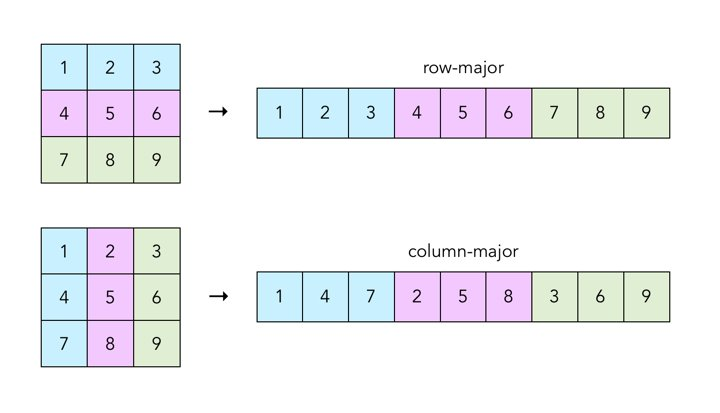

## Ndarray a partir de ficheros

NumPy tiene [operaciones de IO para conectar con ficheros e importar datos](https://numpy.org/devdocs/reference/routines.io.html)

Por ejemplo para leer un archivo en formato CSV podemos usar  [genfromtxt](https://numpy.org/devdocs/user/basics.io.genfromtxt.html)

No entraremos en detalle pues en una próxima clase veremos la librería pandas que provee funciones mucho más poderosas y flexibles para parsear datos 

In [ ]:
!head covid19_extract.csv

In [ ]:
np.genfromtxt('covid19_extract.csv', delimiter=',', names=True,
              dtype= ['U50', 'U50', 'f8', 'f8'] + ['i4']*100)

## Funciones generadoras de arreglos

Se pueden crear arreglos directamente desde Numpy:

In [ ]:
display(np.zeros(shape=(3, 3), dtype=np.int))  # Lleno de ceros
display(np.ones(shape=(3, 3), dtype=np.float32))  # Lleno de unos
display(np.full(shape=(3, 3), fill_value=np.pi))  # Lleno de PI
display(np.eye(3))  # Matriz identidad
display(np.random.randn(3, 3))  # Matriz aleatoria con distribución N(0, 1)

Existen versiones de estas funciones que copian el tamaño de otro ndarray

In [ ]:
display(np.zeros_like(A))

Funciones para crear rangos:

In [ ]:
display(np.arange(start=0, stop=5, step=0.5))  
display(np.linspace(start=0, stop=10, num=11)) 
display(np.logspace(start=-1, stop=1, num=11))

Se puede usar `meshgrid` para crear arreglos de coordenadas

In [ ]:
x = np.arange(3)
X, Y = np.meshgrid(x, x)
display(X)
display(Y)

Ojo con los tamaños de los arreglos 

Un arreglo unidimensional puede ser 
- vector adimensional
- vector columna
- vector fila

In [ ]:
A = np.array([0, 1, 2, 3, 4]) # Vector adimensional
display(A.shape)
A = np.array([[0], [1], [2], [3], [4]]) # Vector columna
display(A.shape)
A = np.array([[0, 1, 2, 3, 4]]) # Vector fila
display(A.shape)

Se puede agregar una dimensión a un arreglo usando `newaxis`

Podemos usarlo para convertir un vector adimensional en fila o columna

In [ ]:
A = np.array([0, 1, 2, 3, 4])
display(A.shape)
display(A[:, np.newaxis].shape)
display(A[np.newaxis, :].shape)

## Manipulación de matrices y vectores

Operaciones para modificar la forma de un arreglo: `reshape`, `tile`, `repeat`

In [ ]:
A = np.arange(6)
display(A)

# Crea nuevas dimensiones pero se debe preservar el tamaño
display(np.reshape(A, (3, 2)))  # in-place: A.reshape(3, 2)
display(np.reshape(A, (2, 3)))

In [ ]:
# Repite el arreglo en una dirección dada
display(np.tile(A, (6, 1)))
display(np.tile(A, (1, 6)))

In [ ]:
# Repite cada elemento en una dirección dada
display(np.repeat(A, 2))
display(np.repeat(A.reshape(3, 2), 2, axis=0))

In [ ]:
# Aplana una matriz
display(np.ravel(np.zeros(shape=(5, 5))))

Se puede crear una matriz diagonal a partir de un vector con `diag`

También sirve para extraer la diagonal de una matriz 

In [ ]:
A = np.arange(5)
display(np.diag(A))
B = np.random.randn(3, 3)
display(B)
display(np.diag(B))

Trasposición de una arreglo con `transpose`

In [ ]:
A = np.arange(9).reshape(3, 3)
display(A)
display(np.transpose(A)) # Equivalente a A.transpose() o A.T

In [ ]:
A = np.arange(8).reshape(2, 2, 2)
display(A)
display(np.transpose(A, axes=(0, 2, 1)))  # Equivalente a: np.swapaxes(A, 2, 1)

Operaciones para juntar dos o más arreglos: `concatenate`, `vstack`, `hstack`

In [ ]:
A = np.arange(6).reshape(1, 6)
B = np.ones(shape=(1,6))

display(np.concatenate((A, B), axis=0))
display(np.concatenate((A, B), axis=1))
display(np.vstack((A, B)))
display(np.hstack((A, B)))

Operaciones para agregar o quitar elementos: `append`, `insert`, `delete`

In [ ]:
np.append?

In [ ]:
A = np.array([1., 2., 3.])
display(A)
display(np.append(A, 4))
display(np.insert(A, 2, values=0.))
display(np.delete(A, 2))

## Indexación y *slicing*

Al igual que otros contenedores de Python los ndarray soportan *slicing*

> Slicing es crear una arreglo a partir de una indexación sobre otro arreglo

Por ejemplo:

In [ ]:
L = [[0, 1, 2], [3, 4, 5]]
A = np.array(L)
display(A)

display(L[1][0]) 
display(A[1, 0]) # Segunda fila, primera columna
display(A[:, 1])  # Segunda columna
display(A[0, :]) # Primera fila 
display(A[1, ::2]) # Elementos de la primera fila y columnas pares
display(A[-1, -2]) # Elementos de la ultima fila y penultima columna

Podemos usar un arreglo de enteros para indexar otro arreglo

In [ ]:
ix = np.array([0, 0, 1])
iy = np.array([0, 1, 1])
A[ix, iy] = 10
display(A)

También podemos indexar usando un arreglo de booleanos

In [ ]:
A = np.array([0, 2, 1, 3, 4])
B = np.array([True, False, False, True, True])
display(A[B])

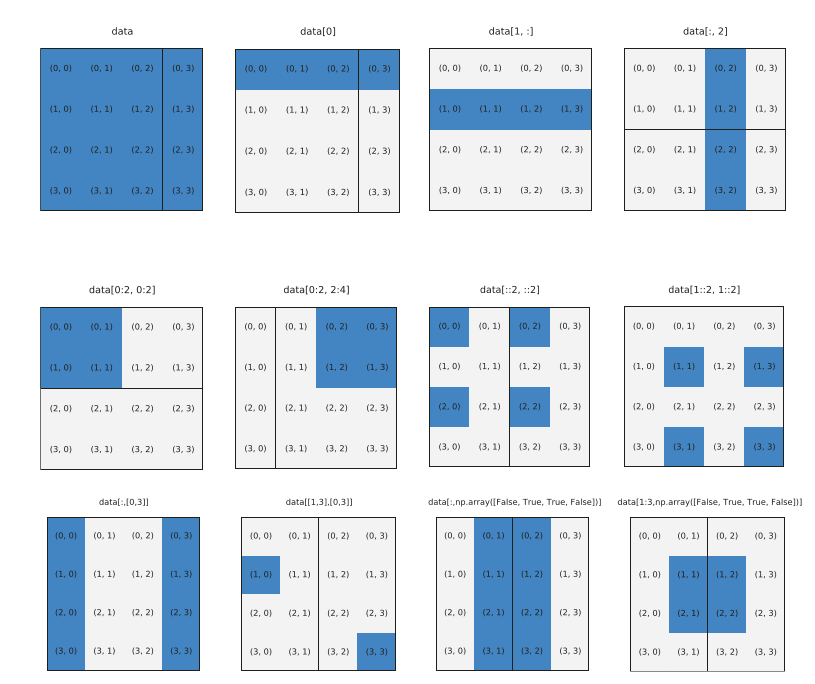

## Nota sobre copias en memoria
Algunas operaciones sobre arreglos no hacen copias (usan referencias)

In [ ]:
A = np.arange(100).reshape(10, 10)
B = A
B is A

Si modifico A se ve reflejado en B

In [ ]:
A[:5, :5] = 100
display(B)

Modificaciones en subarreglos (vistas) también son referenciadas

In [ ]:
A = np.arange(100).reshape(10, 10)
B = A[:5, :5]
display(B is A)
B[:, :] = 100
display(A)

Se puede forzar la creación de una copia con el método `copy()`

In [ ]:
B = A.copy()
A[0, 0] = 0
display(B[0])

# Operaciones sobre ndarray

## Operaciones aritméticas y *Broadcasting* 

- Suma:  +, +=
- Resta: -, -=
- Multiplicación:  *,*= 
- División: /, /=
- División entera: //, //=
- Exponenciación: ** , **=

Estas operaciones tienen un comportamiento element-wise (elemento a elemento), es decir

$$
\pmatrix{0 & 1 \\2 & 3 } * \pmatrix{1 & 5 \\2 & 2 } = \pmatrix{0 & 5 \\4 & 6 }
$$

In [ ]:
N = 3
A = np.eye(N)
B = np.ones(shape=(N, N))
display(A)
display(B)
display(A + B)
display(A*B)  

Cuando los términos no son del mismo tamaño se hace un *broadcast*

Por ejemplo operar una constante con un arreglo

In [ ]:
A - 1

o operar con arreglos de distinto número de dimensiones

In [ ]:
C = np.arange(N)
display(C)
display(B)
display(B + C)
display(B + C.reshape(-1, 1))

In [ ]:
display(C.reshape(1, N))
display(C.reshape(N, 1))
display(C.reshape(1, N) + C.reshape(N, 1))

#### Reglas de *broadcasting* en Numpy   <a class="tocSkip">

1. Si dos arreglos son de dimensiones distintas la dimensión del más pequeño se agranda con "1"s por la izquierda
1. Si dos arreglos tienen tamaños ditintos, el que tiene tamaño "1" se estira en dicha dimensión
1. Si en cualquier dimensión los tamaños son distintos y ninguno es igual a "1" ocurre un error


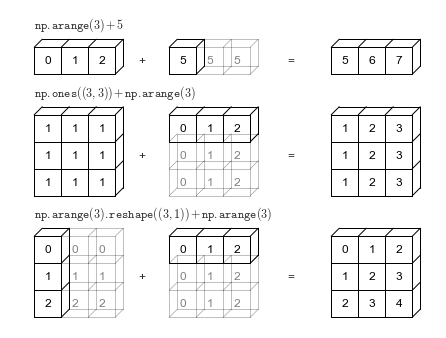

Ref: https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Broadcasting

In [ ]:
A = np.arange(6).reshape(2, 3)
display(A)
display(A.shape)
B = np.arange(3)
display(B)
display(B.shape)
display(B.reshape(1, -1))
A + B

## Operaciones matriciales

Para realizar una multiplicación matricial podemos usar `dot` o el operador `@`

In [ ]:
A = np.arange(4).reshape(2, 2)
B = np.arange(4)[::-1].reshape(2, 2)
display(A, B)
display(A*B)  
display(np.dot(A, B))  

Otras funciones útiles son:
- `np.inner` que calcula el producto escalar o producto interno
- `np.outer` que calcula el producto externo
- `np.cross` que calcula  cruz

In [ ]:
display(np.inner(A, B))
display(np.outer(A, B))

Cuando revisemos el módulo `linalg` veremos más funcionalidades de álgebra lineal

## Operaciones de reducción

Llamamos **reducción** a una operación que **agrega** los valores de un arreglo entregando un único valor como respuesta

La reducción más básica es la **suma agregada**

$$
[0, 1, 2, 4, 3] \rightarrow 0 + 1 + 2 + 4 + 3 = 10 
$$

> Las operaciones de reducción se usan ampliamente para resumir datos y hacer estadística


Algunas de las reducciones disponibles en NumPy son:
- `sum`, `prod`
- `amax`, `amin`, `argmax`, `argmin`
- `mean`, `std`, `var`, `percentile`, `median`
- `cumsum`, `cumprod`

In [ ]:
A = np.tile(np.arange(3), (3, 1))
display(A)
display(np.sum(A, axis=0))
display(np.sum(A, axis=1))
display(np.sum(A))

In [ ]:
A = np.random.randn(3, 3)
display(A)
display(np.amax(A, axis=0))
display(np.argmax(A, axis=0))

Las operaciones de reducción de NumPy son altamente eficientes

Hagamos una pequeña prueba de desempeño sumando  un vector

In [ ]:
A = np.arange(100000)

def suma_loop(arreglo):
    suma = 0.
    for elemento in arreglo:
        suma += elemento
    return suma

L = list(A)
%timeit -n10 suma_loop(A)
%timeit -n10 suma_loop(L)
%timeit -n10 sum(A)
%timeit -n10 sum(L)
%timeit -n10 np.sum(L)
%timeit -n10 np.sum(A)

display(np.sum(A))
display(sum(L))

Muchas de estas funciones están implementadas como métodos de la clase arreglo

In [ ]:
display(A.sum())
display(A.max(axis=0))
display(A.min())

También cuenta con versiones seguras contra NaNs

In [ ]:
A = np.array([1., 10., 2., np.nan])
display(np.sum(A))
display(np.nansum(A))

Nota: Si queremos encontrar los nan en un arreglo podemos usar `isnan` 

In [ ]:
np.isnan(A)

## Operaciones vectorizadas

Son funciones que operan de forma *element-wise* o elemento a elemento


Por ejemplo para calcular el valor absoluto de los elementos de un arreglo

In [ ]:
A = np.random.randn(3, 3)
display(A)
np.absolute(A) # Equivalente a np.abs(A)

Exponenciar un arreglo

In [ ]:
x = np.arange(10)
display(np.power(x, 2))
display(np.sqrt(x))
display(x**2)

Calcular funciones exponencial, logaritmo y trigonométricas  a partir de una arreglo

In [ ]:
x = np.array([0.1, 1., 10.0])
display(np.log(x)) #log2, log10
display(np.exp(x)) 
display(np.sin(x)) #arcsin, sinh
display(np.cos(x)) #arccos, cosh
display(np.tan(x)) #arctan, tanh

Otras funciones: `sign`, `reciprocal`, `round` `floor`, `ciel`, `real`, `imag`,  `conj`, 

## Operaciones booleanas 

NumPy soporta operaciones booleanas sobre ndarray

In [ ]:
A = np.arange(6).reshape(2, 3)
display(A)
display(A == 4)
display(np.equal(A, 4))

Podemos crear una máscara booleana para indexar un arreglo

In [ ]:
mask = ~(A % 2 == 0) & (A > 2)
display(mask)
display(A[mask])

La función `where` sirve para recuperar el índice de los elementos que cumplen una cierta condición

In [ ]:
(ixs, iys) = np.where(~(A % 2 == 0) & (A > 2))

for i, j in zip(ixs, iys):
    display("Fila {0} Columna {1} Valor {2}".format(i, j, A[i, j]))

Funciones `any` y `all`

In [ ]:
x = np.random.randn(3, 3)
display(x)
b = (x > 0) & (x**2 > 0.5)
display(b)

display(np.any(b))
display(np.all(b))

## Operaciónes de conjutos

Operaciones de tipo union, intersección y diferencia entre arreglos 1D

Si se les entrega un arreglo de mayor dimensión este se aplanará automaticamente

In [ ]:
A = np.arange(6)
B = np.array([0, 1, 10, 100])
display(A)
display(B)

In [ ]:
display(np.union1d(A, B)) # Union de A y B 
display(np.intersect1d(A, B)) # Intersección de A y B
display(np.setdiff1d(A, B)) # Lo que hay en A y no en B
display(np.setdiff1d(B, A)) # Lo que hay en B y no en A

## Ordenando arreglos

NumPy provee la función `np.sort` para ordernar un ndarray

Se puede usar el argumento `kind` para escoger distintos algoritmos de ordenamiento (por defecto quicksort)

El argumento `axis` especifica que eje se va a ordenar

In [ ]:
A = np.random.randn(2, 2)
display(A)
display(np.sort(A, axis=1))
display(np.sort(A, axis=0))
display(np.sort(A, axis=None))

La función `np.argsort` entrega un arreglo de índices que ordena el arreglo de menor a mayor

In [ ]:
A = np.array(["A", "B", "C"])
B = np.array([2, 4, 1])

idx = np.argsort(B)
display(idx)
display(A[idx])

# Módulos de NumPy


## [`np.random`](https://numpy.org/doc/stable/reference/random/index.html)

Es un módulo para generar permutaciones y arreglos de números aleatorios siguiendo distintas distribuciones


- `np.random.rand(d1, d2, ... ,dn)` Genera flotantes con distribución uniforme en [0, 1)
- `np.random.seed` Especifica la semilla para inicializar el generador de números pseudo-aleatorios

In [ ]:
np.random.seed(0)

data = np.random.rand(10)
display(data)

Mayor control sobre el generador de números aleatorios con `get_state` y `set_state`

In [ ]:
rstate = np.random.get_state()
data = np.random.rand(10)
display(data)
data = np.random.rand(10)
display(data)
np.random.set_state(rstate)
data = np.random.rand(10)
display(data)

- `np.random.randn` Números con distribución normal estándar $\mathcal{N}(0, I)$

In [ ]:
data = np.random.randn(10)
display(data)

- `np.random.randint` Números con distribución categórica (discreta)

In [ ]:
data = np.random.randint(low=0, high=10, size=10)
display(data)

- `np.random.choice` Extrae una muestra aleatoria de una arreglo

In [ ]:
x = np.array([0, 1, 10, 100, 1000, 10000])
np.random.choice(x, size=2, replace=False)

Si se entrega un entero D es equivalente a entregar range(D)

In [ ]:
np.random.choice(10, size=10, replace=True)

- `np.random.permutation` Crea una permutación de indices 

In [ ]:
idx = np.random.permutation(len(x))
display(idx)
display(x[idx])

- `np.random.shuffle` Desordena una arreglo (*inplace*)

In [ ]:
np.random.shuffle(x)
display(x)

`np.random` ofrece una gran cantidad de distribuciones para crear números aleatorios

Estudiaremos algunas de ellas en la siguiente unidad del curso

## [`linalg`](https://numpy.org/doc/stable/reference/routines.linalg.html)

Es un módulo con implementaciones muy eficientes para hacer álgebra lineal y operaciones matriciales
- Calcular matriz inversa, determinantes y trazas
- Resolver sistemas lineales
- Factorizar matrices
- Calcular valores y vectores propios

> Revisaremos este módulo en gran detalle en la Unidad 2 del curso

En este cuadernillo sólo revisaremos operaciones básicas

In [ ]:
A = np.arange(4).reshape(2,2)
display(A)
# a*d - b*c
display(np.linalg.det(A))
# sqrt(a^2 + b^2 + c^2 + d^2)
display(np.linalg.norm(A))
# Inversa
display(np.dot(A, np.linalg.inv(A)))

# Tópicos extra: 

## NumPy para usuarios de Matlab

En la documentación de NumPy, en la sección [NumPy para usuarios de Matlab](https://numpy.org/devdocs/user/numpy-for-matlab-users.html) se describen las diferencias clave entre NumPy y Matlab y se presenta una tabla de equivalencias entre las funciones de ambos


## Extender NumPy

NumPy provee una [API en lenguaje C para manipular ndarray a bajo nivel](https://numpy.org/devdocs/user/c-info.html)

La API se puede usar para crear nuevas funcioens y módulos que utilicen ndarray

## Computación simbólica 

La computación simbólica es un paradigma donde los cálculos se hacen de forma *análitica* en lugar de *númerica*

Se definen variables o simbolos que son operados algebraicamente

Este paradigma se usa tipicamente para obtener expresiones simplificadas de derivadas o integrales, series, límites, factorizaciones, expansiones, etc

- Paradigma númerico: Nos da el resultado de una expresión
- Paradigma simbólico: Nos da la expresión

En Python se puede hacer computación simbólica con [SimPy](https://www.sympy.org)
